<a href="https://colab.research.google.com/github/ANSHBHARDWAJ22/IMAGE-CLASSIFICATION-CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import random
import matplotlib.pyplot as plt

In [ ]:
x_train=np.loadtxt('input.csv',delimiter=',')
y_train=np.loadtxt('labels.csv',delimiter=',')

x_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

# np.loadtxt is a function from the NumPy library that loads data from a text file (in this case, a CSV file)
#  and returns it as a NumPy array.

# delimiter=',' specifies that the data in the CSV file is separated by commas.

In [ ]:
# reshape the data
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)


In [ ]:
#resize the x_train and x_test set  for better calculations
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[1:]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

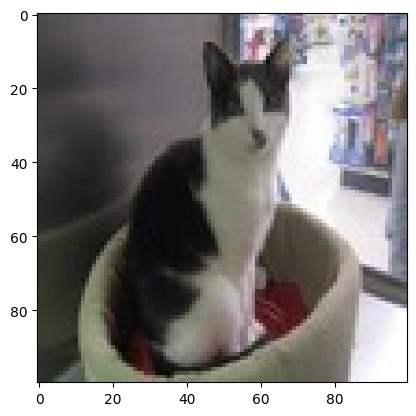

In [ ]:
idx=random.randint(0,len(x_train))    # code for displaying some random images..
plt.imshow(x_train[idx,:])
plt.show()

# plt.imshow() is a function from the Matplotlib library used to display images.

In [ ]:
# the main CNN and the nueral layer
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')


])

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# now the loss funtion and the backpropagation step
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



In [ ]:
model.fit(x_train,y_train,epochs=5,batch_size=64)
# if we run this more than one time it will resume from there and  will increase the accuracy

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - accuracy: 0.4984 - loss: 1.1861
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 293ms/step - accuracy: 0.6172 - loss: 0.6638
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 311ms/step - accuracy: 0.7142 - loss: 0.5822
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 308ms/step - accuracy: 0.8185 - loss: 0.4887
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 247ms/step - accuracy: 0.8670 - loss: 0.3386


In [ ]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6053 - loss: 0.7349


[0.6433709859848022, 0.6800000071525574]

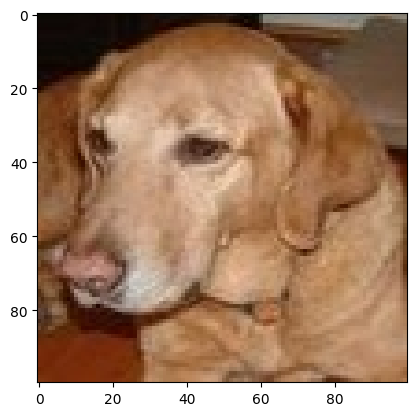

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
our model says that it is a  cat


In [ ]:
# making the final predictions

index=random.randint(0,len(y_test))
plt.imshow(x_test[index,:])
plt.show()

y_pred=model.predict(x_test[index,:].reshape(1,100,100,3))  # here y_pred is giving the probablity if this is
# close to zero it is dog otherwise cat because class  zero is a dog and 1 is a cat

#print(y_pred)
y_pred= y_pred>0.5
if(y_pred==0):
    pred='dog'
else:
    pred='cat'
print("our model says that it is a ",pred)
